In [1]:
# from https://www.kaggle.com/users/123235/fchollet/digit-recognizer/simple-deep-mlp-with-keras
%pylab inline

import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

Populating the interactive namespace from numpy and matplotlib


In [20]:
# Read data
#train = pd.read_csv('../data/train.csv')
train = pd.read_csv('train_f.csv')
labels = train.ix[:,0].values.astype('int32')
X_train = (train.ix[:,1:].values).astype('float32')
#X_test = (pd.read_csv('../data/test.csv').values).astype('float32')
X_test = (pd.read_csv('test_f.csv').values).astype('float32')

In [21]:
# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 

In [22]:
n = X_train.shape[1]
m_train = X_train.shape[0]
m_test = X_test.shape[0]

mu = numpy.mean(X_train, axis=0)
sigma = numpy.std(X_train, axis=0)

Xn_train = np.zeros(X_train.shape)
Xn_test = np.zeros(X_test.shape)

for i in range(n):
    if sigma[i] > np.spacing(1):
        Xn_train[:,i] = (X_train[:,i] - mu[i])/sigma[i]
        Xn_test[:,i] = (X_test[:,i] - mu[i])/sigma[i]

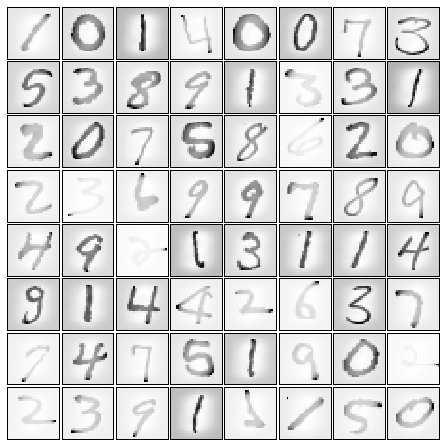

In [37]:
# copied from notebook 02A_representation_of_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(Xn_train[i].reshape(28, 28), cmap=plt.cm.Greys, interpolation='nearest')

In [72]:
# pre-processing: divide by max and substract mean
#scale = np.max(X_train)
#X_train /= scale
#X_test /= scale

#mean = np.std(X_train)
#X_train -= mean
#X_test -= mean

input_dim = Xn_train.shape[1]
nb_classes = y_train.shape[1]
hidden_dim = 625
hidden_layers = 5
dropout = 0.15

In [73]:
model = None

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(input_dim, hidden_dim, init='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dropout(dropout))
for i in range(hidden_layers - 1):
    model.add(Dense(hidden_dim, hidden_dim, init='lecun_uniform'))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
model.add(Dense(hidden_dim, nb_classes, init='lecun_uniform'))
model.add(Activation('relu'))

In [74]:
# we'll use MSE (mean squared error) for the loss, and RMSprop as the optimizer
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
print("Training...")
model.fit(Xn_train, y_train, nb_epoch=15, batch_size=16, validation_split=0.1, show_accuracy=True, verbose=2)

In [ ]:
for i in range(len(model.layers)):
    weights = model.layers[i].get_weights() # list of numpy arrays
    if len(weights) > 0:
        print weights[0].shape
        pn = weights[0].shape[0]
        ps = np.sqrt(pn)
        wn = weights[0].shape[1]
        ws = np.ceil(np.sqrt(wn))

        # copied from notebook 02A_representation_of_data.ipynb
        fig = plt.figure(figsize=(6, 6))  # figure size in inches
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

        # plot the digits: each image is 8x8 pixels
        for i in range(wn):
            ax = fig.add_subplot(ws, ws, i + 1, xticks=[], yticks=[])
            ax.imshow(weights[0][:,i].reshape(ps, ps), cmap=plt.cm.Greys, interpolation='nearest')

In [ ]:
X_test.shape

In [ ]:
print("Generating test predictions...")
preds = model.predict_classes(Xn_test, verbose=0)
proba = model.predict_proba(Xn_test, verbose=0)

In [ ]:
l = 10
num_rounds = 11
mf_test = m_test/num_rounds
predicted = np.empty((mf_test, 2), dtype=int)

for i in range(mf_test):
    s = numpy.zeros((num_rounds, l), dtype=float64)
    for j in range(num_rounds):
        s[j, :] = proba[i + j*mf_test, :]
    predicted[i, :] = np.unravel_index(np.argmax(np.sum(s, axis=0)), (num_rounds, l))

In [ ]:
print np.sum(s, axis=0)

In [ ]:
import datetime
st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y%m%d_%H%M%S')

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds[range(28000)], "keras-mlp_" + st + ".csv")
#write_preds(predicted[:, 1], "keras-mlp_" + st + ".csv")